In [6]:
import numpy as plt
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


In [7]:
X,y=make_moons(100,noise=0.25,random_state=2)

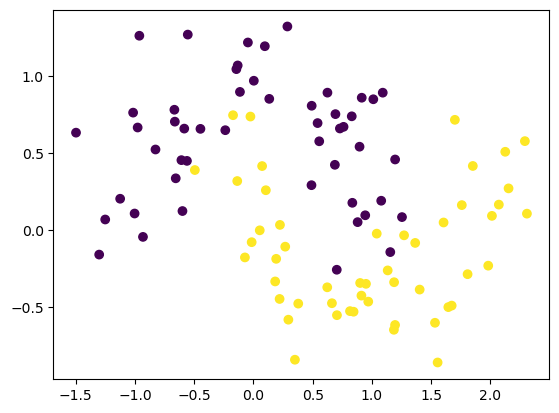

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [12]:
model1=Sequential()
model1.add(Dense(128,input_dim=2,activation="relu"))
model1.add(Dense(128,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
adam=Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history1=model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 25s 3ms/step


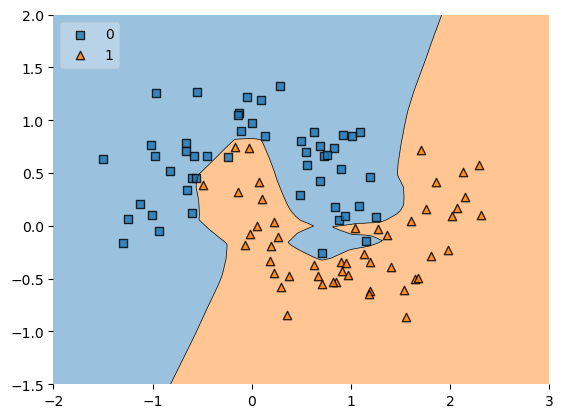

In [14]:
plot_decision_regions(X,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

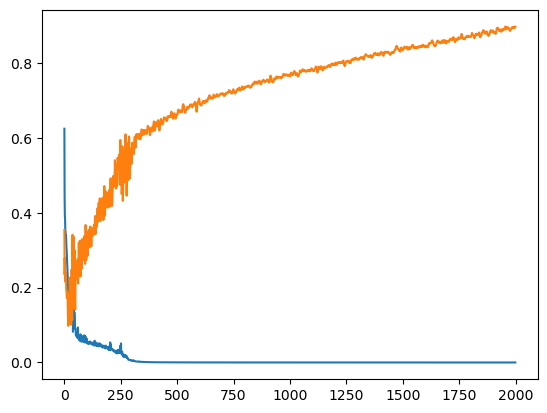

In [15]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [19]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               384       
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
adam=Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history2=model2.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 13s 1ms/step


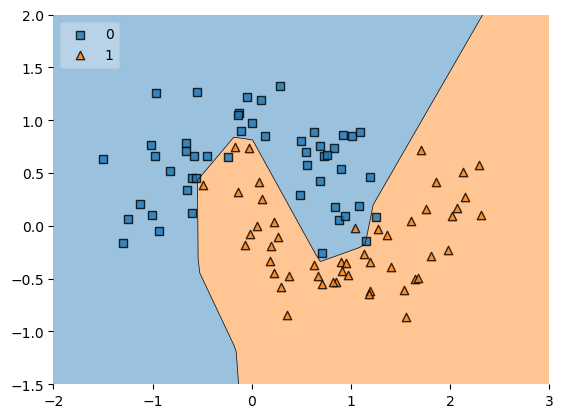

In [21]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

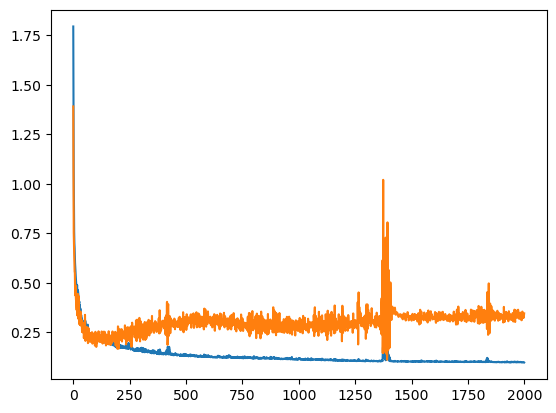

In [22]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [23]:
model1_weight_layer1=model1.get_weights()[0].reshape(256)
model2_weight_layer2=model2.get_weights()[0].reshape(256)